# Rishabh Gupta

# Task - Prediction Using DecisionTree

In [1]:
#importing important models, metrics, and other tools
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
#importing the datafile
data = pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\Iris.csv',index_col ='Id')

In [3]:
data.shape
#150 sample points of 5 variabels : 1 target variable and 4 attributes

(150, 5)

In [4]:
data.info()
# lack of presence of null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
#peek at the data
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


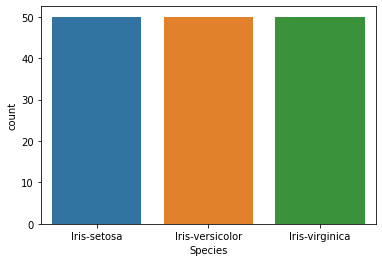

In [6]:
sns.countplot(x='Species',data=data)
# Each species is equally present in the data, this means that there is balanced dataset.

In [7]:
#descriptive statistics
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Insights
a) SepallengthCm and sepalwidthcm appear to behave in a normal distribution (as  mean and 50 % value are approximately).

b) PetalLength and petalwidth are left skiwed (as mean <50% value)  , that is each variable seems to have frequent  occurence      of lower valeus)

c)  25% value and min value do not have much difference. The same goes to the 75 % and max value. It means that there are lack or very few outliers in the data

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

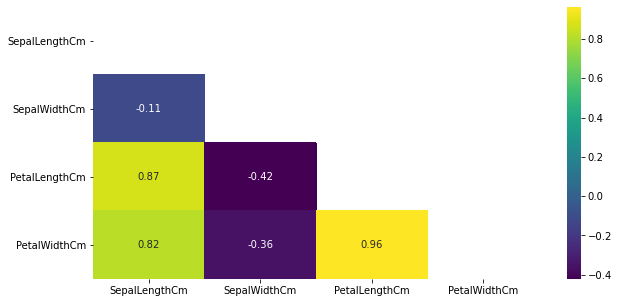

In [8]:
#correlation matrix
plt.figure(figsize =(10,5))
cor  = data.corr()
mask = np.zeros(cor.shape,dtype =bool) # getting a matrix having its values equal to false for all corr
mask[np.triu_indices(len(mask))] = True # now putting its lower side tringular equal to true
sns.heatmap(cor,annot=True, cmap ='viridis',mask = mask)#here mask works as a condition to get the lower triang. part of matrix
plt.xticks(rotation =0)

## Intrepretation:
a) sepal length is highly correlated with petalwidth and petal length

b)petallength too and petalweidth are also having high correlation

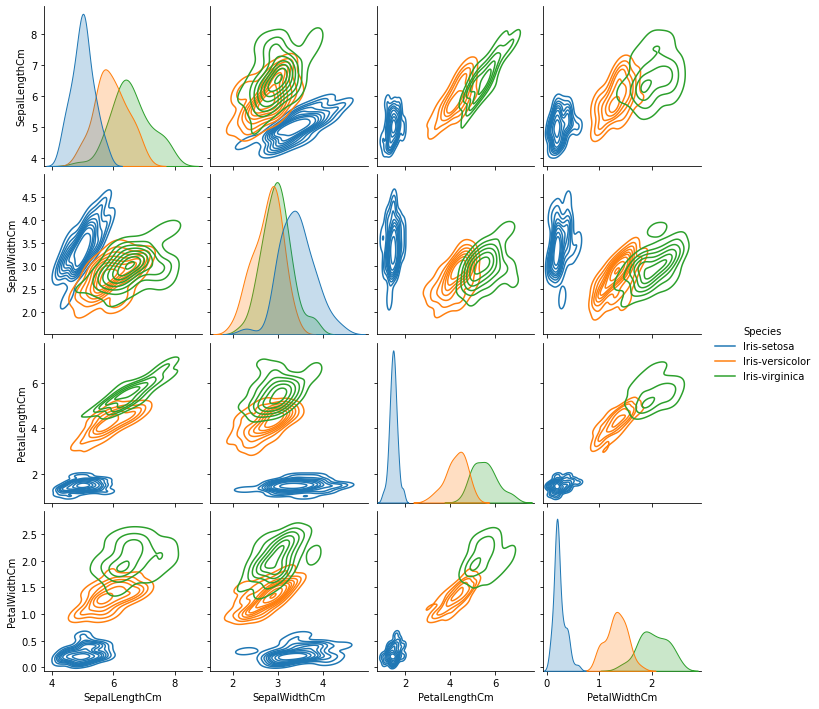

In [9]:
#pairplot : showing pairwise relationship and actual distribution of each atribute
sns.pairplot(data,kind ='kde',hue ='Species')

## Intrepretation:
1) In case of species of iris-setosa, there seems be a negligible or lack of correlation among the majority of feature variables . 

2) On the other hand, we observe some high correlaton for other two species

3) Each attribute is close to normally distributed for each type of species, but the same can't be said for the entire one


In [10]:
#How the values of attributes varies for each species
data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


# 
Iris virginica has the highest mean values for each attribute, while Iris setosa has lowest average

In [11]:
data1 = data.copy() # working on a copy of the raw data (keeping in intact )

In [12]:
lc = LabelEncoder() # https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/              for more help
data1['Species'] =lc.fit_transform(data1['Species'])

In [13]:
x = data1.drop('Species',axis =1 )
y = data1['Species']
# conversion into array ; for better way of representation
x_a = np.array(x) #          
y_a = np.array(y)

In [14]:
#train_test division
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size =0.25,random_state =0) #25 % test size 

In [15]:
# Setting up decision tree model with some 
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

## Checking for overfitting:
In most of the cases, decision trees tend to overfit the model because of their greedy approach. The overfitting ocurs when there are substantial  discrepancies between prediction on test and training data. Now, we will see the prediction on both training and testing data

In [16]:
# prediction on training
print(dt.score(x_train,y_train))
# its 100 percent
#prediction on testing
print(dt.score(x_test,y_test))
# its 97 percent

1.0
0.9736842105263158



The difference between the prediction on testing and training data is small. It implies that the given model 
does not overfit the data

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


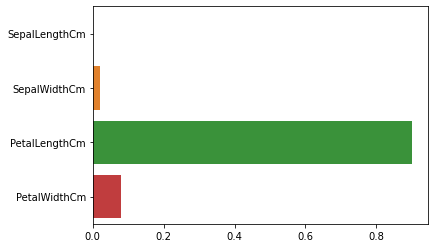

In [17]:
#feature importance
importance =dt.feature_importances_
# petalwidth is the most important feature considered in establishing model
feature_names = np.array(x.columns)
sns.barplot(importance,feature_names)

## Intrepretation:
Only 'petallengtcm' is the single feature variable playing the most important role in the model preparation. It does not mean that other variables are not important. It may have occured due to high correlation among these variables which makes their inclusion insignificant in model preparation (as the case here!).


In [18]:
#predicting the  y_test values
y_pred = dt.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



##  Intrepretation about the metrics
a) There is an an average accuracy of 97 percent of the model.

b) Recall is also approximately equal to precision (that is 97%) . This means that the model is able to predict accuractely (that is precision) while at the same time, it is able to dig out the correct predictions out of actual values(that is recall) with the same sucess rate.

##  Tuning the model
We will tune the max_depth for the model. The depth of a tree is given by distance between the root and any leaf (in terms of nodes).



In [20]:
#Max_depth between 1 and 5
para =  {'max_depth' : np.arange(1,6) }

In [21]:
# using gridsearch for finding out the hyperparameter working best for the model based on accuracy
gs = GridSearchCV(DecisionTreeClassifier(),param_grid =para, refit =True,scoring = 'accuracy')

In [22]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5])},
             scoring='accuracy')

In [23]:
gs.best_params_

{'max_depth': 3}

In [24]:
#Getting the prediction for each value of max_depth
scoring =[]
for depth in np.arange(1,6):
    cl = DecisionTreeClassifier(max_depth=depth)
    cl.fit(x_train,y_train)
    scoring.append(cl.score(x_test,y_test))

In [25]:
scoring

[0.5789473684210527,
 0.8947368421052632,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

([<matplotlib.axis.XTick at 0x21c54909610>,
 <a list of 6 Text major ticklabel objects>)

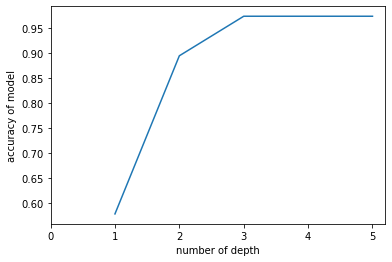

In [26]:
plt.plot(np.arange(1,6),scoring)
plt.xlabel("number of depth")
plt.ylabel("accuracy of model")
plt.xticks(range(6))

## Intrepretation:
The optimal one seems to be 3 number of depth as there is no change in overall prediction after this level of depth.

In [27]:
#use decision tree 
df = DecisionTreeClassifier(criterion ='gini',max_depth = 3,random_state =0)
df.fit(x_train,y_train)
df.score(x_test,y_test) # accuracy level


0.9736842105263158

In [28]:
y_pred = df.predict(x_test)

##  Data Visualization
We will visualize the results derived through the export_graphviz which is a freely available graph visualization software.

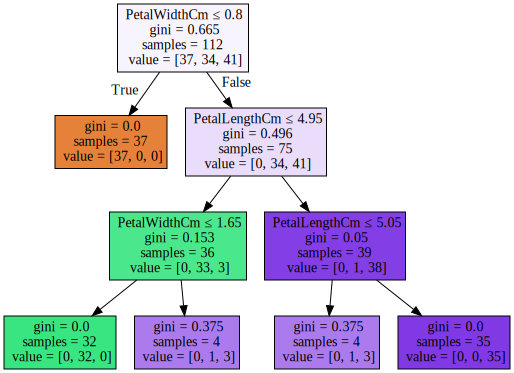

In [29]:
import graphviz
dot_data = tree.export_graphviz(df,feature_names =x.columns,filled=True,special_characters= True) # getting tree data in a dot file
graph = graphviz.Source(dot_data)
graph

## Intrepretation:
a) The above  decision tree gives a set of rules on which feature variables are split for prediction purpose. First, it is split on  petalwidth then on petallength. This goes on till the point the accuracy does not change.

b) We do not have pure leaf nodes, that is, there are no leafs with zero gini impurity. This is because even if we had split it further on other or same features, this would have brought no positive impact on accuracy.

##  Conclusion:
We obtain  the following information on the model:
a) The value of 'max_depth' hyperparameter is 3.
b) There is lack of  observation of  any overfitting by the model.
c) There is an accuracy, precision and recall of 97 percent for the model


# Thanks